In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime
%matplotlib inline

In [2]:
df = pd.read_csv('Weather_Data/2001.csv')
for x in range(2002,2016):
    fname = 'Weather_Data/' +str(x)+'.csv'
    df_tmp = pd.read_csv(fname)
    df = pd.concat([df, df_tmp])
    

In [3]:
def str2datetime(input):
    return datetime.datetime.strptime(input, "%Y-%m-%d")
def removeNonNumeric(input):
    if type(input) is str:
        try:
            return float(input)
        except:
            return 0.0
    else:
        return input

In [4]:
df['time'] = df['PST'].apply(str2datetime)
df['precipitation'] = df['PrecipitationIn'].apply(removeNonNumeric)
dff = df.set_index('time')

In [5]:
precipitationByYear = np.zeros(15)
for x in range(0, 15):
    print dff[dff.index.year == x + 2001]['precipitation'].sum()
    precipitationByYear[x] = dff[dff.index.year == x + 2001]['precipitation'].sum()

26.16
19.48
18.63
19.0
26.92
20.85
11.53
15.06
16.45
23.76
16.59
21.47
3.4
20.7
8.33


In [6]:
temperatureMeanByYear = np.zeros(15)
for x in range(0, 15):
    print dff[dff.index.year == x + 2001]['Mean TemperatureF'].mean()
    temperatureMeanByYear[x] = dff[dff.index.year == x + 2001]['Mean TemperatureF'].mean()
temperatureMeanByYearC = [(x - 32)*5.0/9 for x in temperatureMeanByYear]

57.4
57.6657534247
58.2602739726
58.8387978142
58.7479452055
57.6931506849
57.7150684932
57.8032786885
58.3726027397
58.8575342466
57.2054794521
57.8360655738
58.2931506849
62.3287671233
60.6602739726


In [7]:
temperatureMaxByYear = np.zeros(15)
for x in range(0, 15):
    print dff[dff.index.year == x + 2001]['Max TemperatureF'].mean()
    temperatureMaxByYear[x] = dff[dff.index.year == x + 2001]['Max TemperatureF'].mean()
temperatureMaxByYearC = [(x - 32)*5.0/9 for x in temperatureMaxByYear]

64.5945205479
64.997260274
65.2054794521
65.9098360656
65.6164383562
64.9863013699
65.0136986301
65.325136612
65.6849315068
65.4876712329
64.2575342466
64.9535519126
66.0136986301
69.6821917808
67.8931506849


In [8]:
temperatureMinByYear = np.zeros(15)
for x in range(0, 15):
    print dff[dff.index.year == x + 2001]['Min TemperatureF'].mean()
    temperatureMinByYear[x] = dff[dff.index.year == x + 2001]['Min TemperatureF'].mean()
temperatureMinByYearC = [(x - 32)*5.0/9 for x in temperatureMinByYear]

50.8575342466
50.7534246575
51.6767123288
52.1147540984
51.5561643836
50.3205479452
50.0136986301
49.8442622951
50.597260274
51.7123287671
49.6876712329
50.2049180328
50.0849315068
54.4821917808
52.9452054795


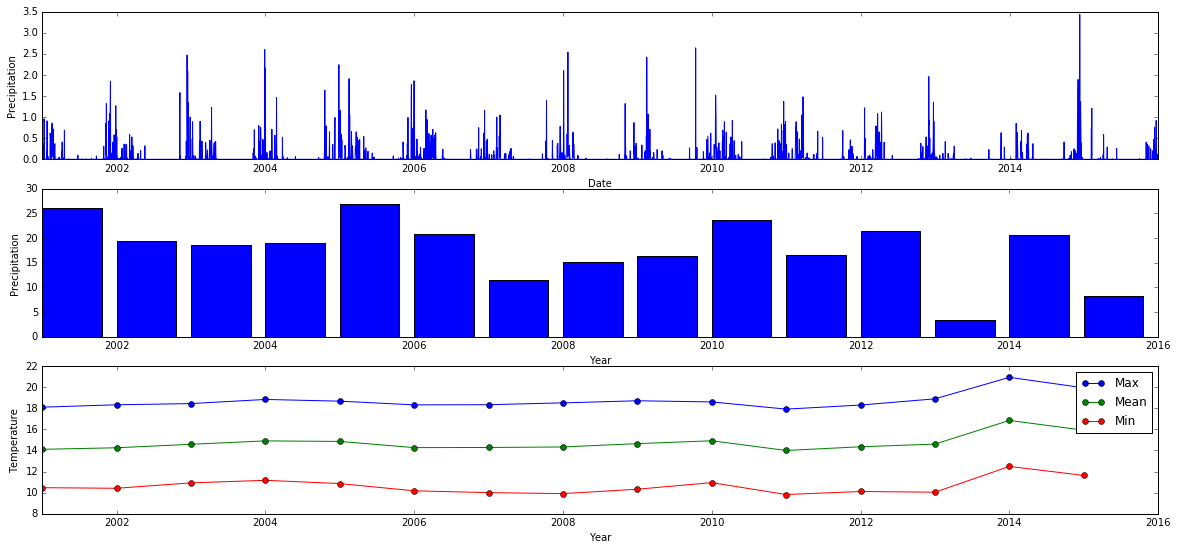

In [17]:
plt.figure(figsize=(20,9), dpi = 200)
plt.subplot(3,1,1)
plt.plot(dff.precipitation)
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.subplot(3,1,2)
plt.bar(range(2001, 2016), precipitationByYear)
plt.xlim([2001,2016])
plt.xlabel('Year')
plt.ylabel('Precipitation')
plt.subplot(3,1,3)
plt.plot(range(2001, 2016), temperatureMaxByYearC, '-o')
plt.plot(range(2001, 2016), temperatureMeanByYearC, '-o')
plt.plot(range(2001, 2016), temperatureMinByYearC, '-o')
plt.legend(['Max','Mean','Min'])
plt.xlim([2001,2016])
plt.xlabel('Year')
plt.ylabel('Temperature')